# Desafio Extra - Distribuição Normal & Outliers

___

# Imports

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
""" habilitando plots no notebook """
%matplotlib inline

In [3]:
""" plot libs """
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
""" Configurando o Matplotlib para o modo manual """
plt.interactive(False)

# Objetivo:

Visualizar uma Distribuição Normal usando Histogramas e Box Plot.


# Dataset:

In [5]:
np.random.seed(123456789)
serie_original = pd.Series(np.random.randn(900)) * 32 + 230 
outliers = pd.Series(np.random.randn(100)) * 320 + 230 

# Instruções

Para cada item abaixo, 

## A) Visualizando a Série Original

Usar Histograma e Box Plot para visualizar:
* a **Série Original**
* os **Outliers**
* a **Série Original** e os **Outliers** na mesma janela

### Gabarito

![](images/pdf_a_1.png)

### Solução

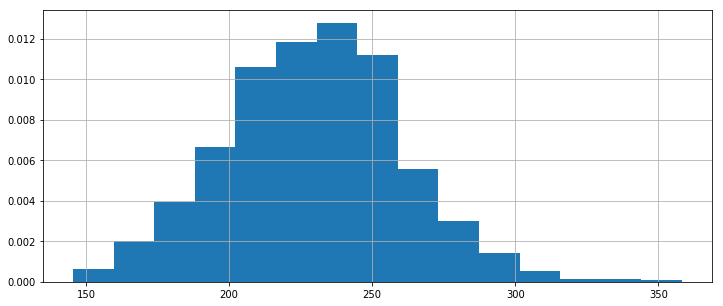

In [6]:
""" Original - histograma """
serie_original.hist(bins=15, normed=True, figsize=(12, 5))
plt.show()

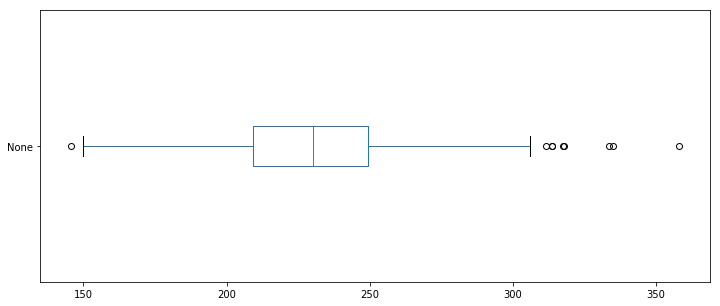

In [7]:
""" Original - boxplot """
serie_original.plot(kind="box", figsize=(12, 5), vert=False)
plt.show()

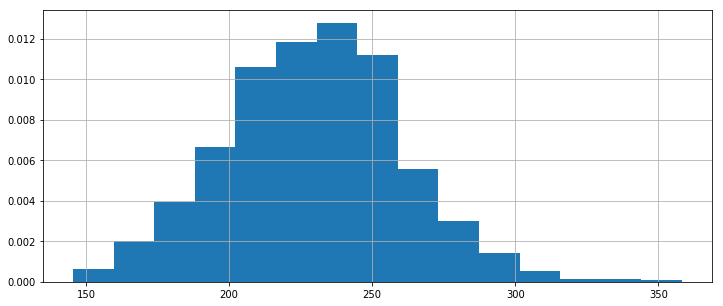

In [8]:
""" outliers - histograma """
serie_original.hist(bins=15, normed=True, figsize=(12, 5))
plt.show()

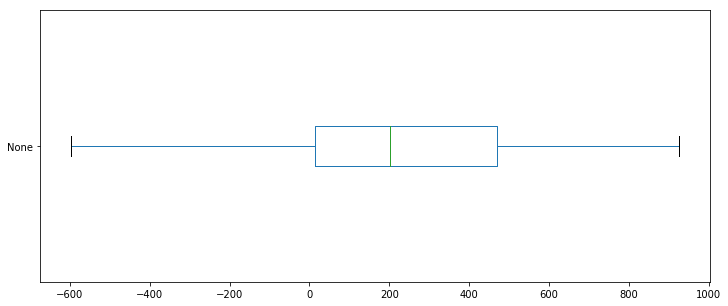

In [9]:
""" outliers - boxplot """
outliers.plot(kind="box", figsize=(12, 5), vert=False)
plt.show()

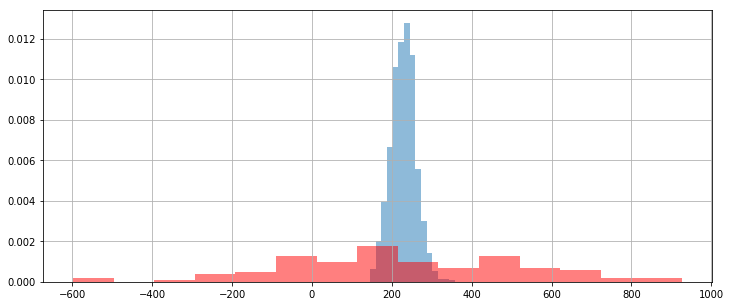

In [10]:
""" Original + Outliers - histograma """
serie_original.hist(bins=15, normed=True, figsize=(12, 5), alpha=0.5)
outliers.hist(bins=15, normed=True, color="red", ax=plt.gca(), alpha=0.5)
plt.show()

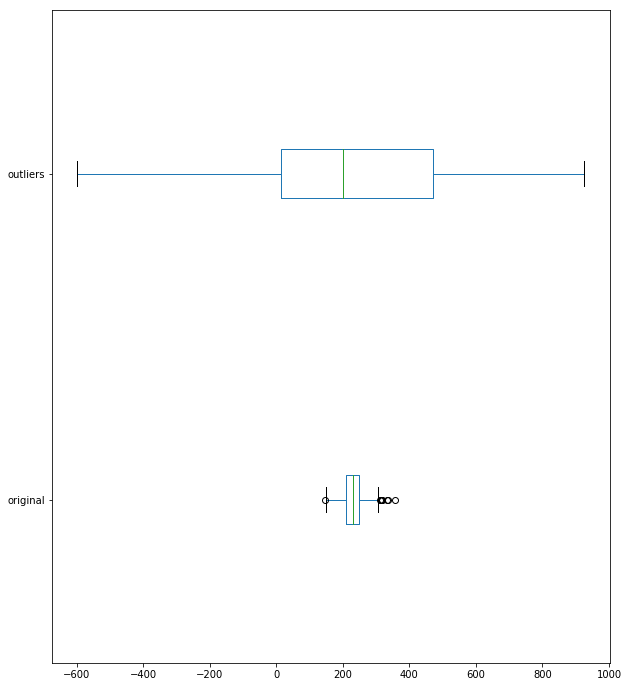

In [11]:
""" Original - boxplot """
pd.DataFrame({
    "original": serie_original,
    "outliers": outliers
}).plot(kind="box", figsize=(10, 12), vert=False)
plt.show()

## B) Exploração de Cortes

Juntar a **Série Original** com os **Outliers** para criar uma **Série Contaminada**. Visualizar a nova série.

Depois, propor cortes na série para eliminar os outliers sem perder muitos dados de dentro da distribuição.

Em cada corte executado, visualizar a distribuição e as medidas de constrole da distribuição.

In [12]:
""" juntando as series """
nova_serie = serie_original.append(outliers).reset_index(drop=True)

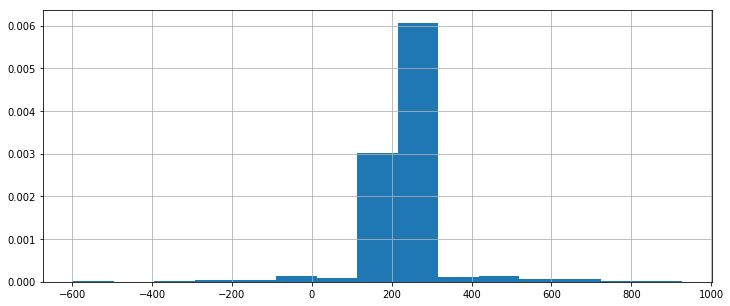

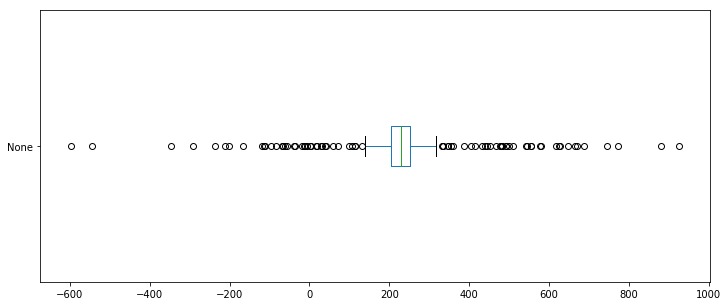

In [13]:
""" primeiro plot: visualizando tudo """
plt.figure(figsize=(12, 5))
nova_serie.hist(bins=15, normed=True)

plt.figure(figsize=(12, 5))
nova_serie.plot(kind="box", vert=False)
plt.show()

In [14]:
""" descrevendo as series original e nova """
pd.DataFrame({
    "original": serie_original,
    "nova": nova_serie
}).describe()

,nova,original
count,1000.000000,900.000000
mean,229.216204,229.479676
std,98.080940,31.113868
min,-598.112663,145.527150
25%,204.775014,209.390173
50%,229.836600,230.043224
75%,251.099340,249.311693
max,926.316246,358.214767


In [15]:
""" descobrindo os cortes """
q1, q3 = nova_serie.describe()[["25%", "75%"]]
iqr = q3 - q1

l_sup = q3 + 1.5 * iqr
l_inf = q1 - 1.5 * iqr

print("Corte Superior: {}; Corte Inferior: {}".format(l_sup, l_inf))

Corte Superior: 320.5858281019646; Corte Inferior: 135.28852542196475


In [16]:
""" aplicando os cortes """
serie_cortada = nova_serie.loc[(nova_serie > l_inf) & (nova_serie < l_sup)]

In [17]:
""" juntando as series em um DataFrame """
tudo_junto = pd.DataFrame({
    "original": serie_original,
    "nova": nova_serie,
    "cortada": serie_cortada
})

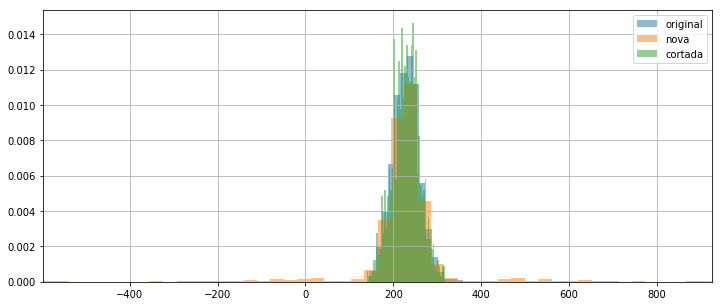

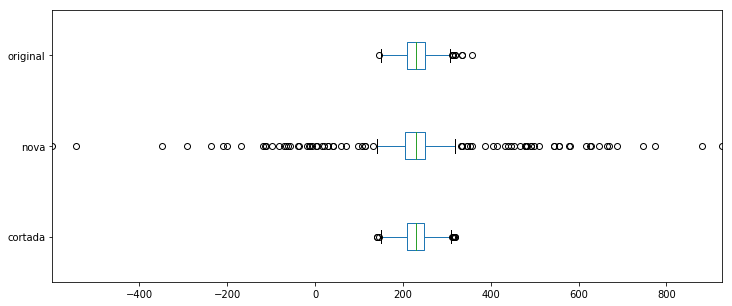

,cortada,nova,original
count,922.000000,1000.000000,900.000000
mean,228.694320,229.216204,229.479676
std,31.318060,98.080940,31.113868
min,139.950067,-598.112663,145.527150
25%,208.249786,204.775014,209.390173
50%,229.747310,229.836600,230.043224
75%,249.161580,251.099340,249.311693
max,317.820426,926.316246,358.214767


In [18]:
""" segundo plot: visualizando tudo """
plt.figure(figsize=(12, 5))
tudo_junto.original.hist(bins=15, normed=True, alpha=0.5, ax=plt.gca(), label="original")
tudo_junto.nova.hist(bins=50, normed=True, alpha=0.5, ax=plt.gca(), label="nova")
tudo_junto.cortada.hist(bins=50, normed=True, alpha=0.5, ax=plt.gca(), label="cortada")
plt.xlim(tudo_junto.min().min(), tudo_junto.max().max())
plt.legend()

plt.figure(figsize=(12, 5))
tudo_junto.plot(kind="box", vert=False, ax=plt.gca())
plt.xlim(tudo_junto.min().min(), tudo_junto.max().max())

plt.show()
tudo_junto.describe()

## C) Criando uma Visualização Composta

Usando a **Série Corrigida**, i.e. com os outliers eliminados, criar um plot de duas janelas empilhadas na vertical.

As janelas do plot devem ser da seguinte forma:

* A janela de cima é um **Box Plot horizontal**
* A Janela de baixo é um **histograma**

As duas janelas devem compartilhar o eixo horixontal, de forma que os atributos da distribuição estejam alinhados.

Dica para uma melhor visualização: use o parâmetro `gridspec_kw = {"height_ratios": [1, 4]}` na função de `subplots` para definir a altura relativa da janela superior (`1`) e da janela inferior (`4`).


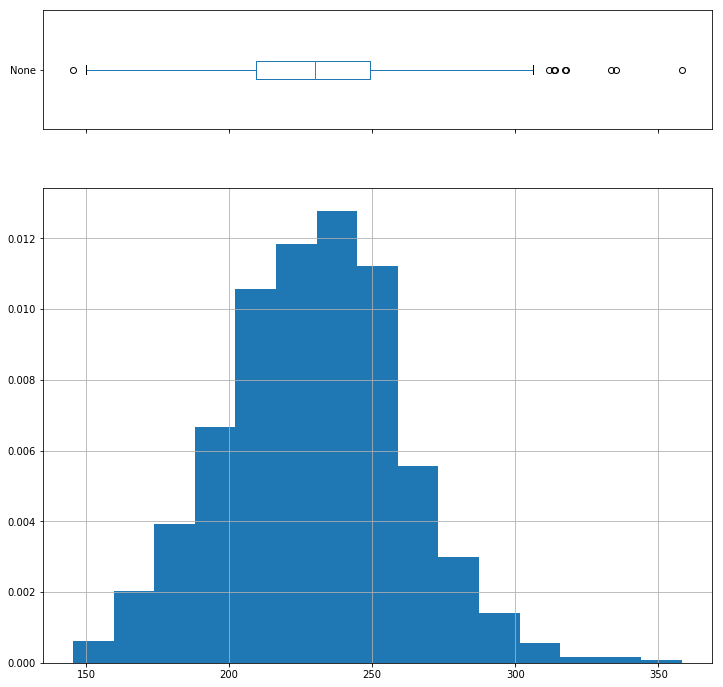

In [19]:
f, ax = plt.subplots(
    2, 1, 
    sharex=True, 
    figsize=(12, 12), 
    gridspec_kw = {"height_ratios": [1, 4]}
)

serie_original.plot(kind="box", vert=False, ax=ax[0])
serie_original.hist(bins=15, normed=True, ax=ax[1])

plt.show()